In [1]:
#load dependencies 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# For generalize additive models (GAM) we will use the pyGAM library
# https://pygam.readthedocs.io/en/latest/
from virtual_headfixation_utils import  StepwiseGAMS, PlotCertainGamVariable,FitGAM
# StepwiseGAMS - encapsulation of stepwise fitting process of individual variables
# input is the list of variables potentially covariates of y ( firing rate of the neuron)
# model tries to add covariates to model if they contribute enough to the explanatory power of the model 

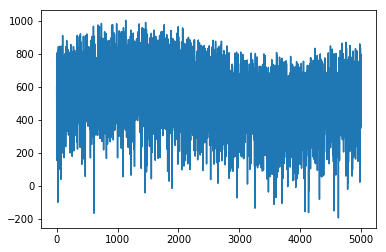

In [2]:
#Create some covariates 
nr_datapoints=5000
x_1 = np.linspace(2,500,nr_datapoints)
x_2 = np.linspace(-200,200,nr_datapoints)
x_3 = np.linspace(-800,300,nr_datapoints)
x_4 = np.linspace(0,200,nr_datapoints)
x_5 = np.linspace(0,2*np.pi,nr_datapoints)
np.random.shuffle(x_1)
np.random.shuffle(x_2)
np.random.shuffle(x_3)
np.random.shuffle(x_4)
#np.random.shuffle(x_5)

# create the response variable y 
b =100
c =0.01
noisiness=3
y = b*np.sin(x_5)+  b * (np.log(x_1 + 5*np.random.random((nr_datapoints,))))- c * (x_2+3*np.random.random((nr_datapoints,)))**2 + np.random.random((nr_datapoints,)) * b*noisiness

#y depends on x_5, x_1, and x_2 but NOT on x_3 and x_4

# plot the response variable y (in case of actuall models its the neural firing rate)
plt.figure()
plt.clf()
plt.plot(y)

In [3]:
# put All available variables into a Pandas Dataframe
data_toy_gam={}
data_toy_gam['x_1'] = x_1
data_toy_gam['x_2'] = x_2
data_toy_gam['x_3'] = x_3
data_toy_gam['x_4'] = x_4
data_toy_gam['x_5'] = x_5
data_toy_gam = pd.DataFrame(data_toy_gam)


In [4]:
# Now we fit the data to the response variable
y = np.reshape(y,(1,-1))
Toy_gam=StepwiseGAMS(data_toy_gam,fire_rate= y,return_model=True,verbose=True)

trying adding x_1 resulting R2:0.235 AIC:111267
trying adding x_2 resulting R2:0.415 AIC:108585
trying adding x_3 resulting R2:0.000 AIC:113936
trying adding x_4 resulting R2:0.001 AIC:113929
trying adding x_5 resulting R2:0.146 AIC:112365
Variable: x_2 added. R2-improved by: 0.415 AIC: 108585
trying adding x_1 resulting R2:0.646 AIC:103578
trying adding x_3 resulting R2:0.415 AIC:108609
trying adding x_4 resulting R2:0.415 AIC:108603
trying adding x_5 resulting R2:0.555 AIC:105881
Variable: x_1 added. R2-improved by: 0.232 AIC: 103578
trying adding x_3 resulting R2:0.647 AIC:103593
trying adding x_4 resulting R2:0.647 AIC:103591
trying adding x_5 resulting R2:0.788 AIC:98509
Variable: x_5 added. R2-improved by: 0.141 AIC: 98509
trying adding x_3 resulting R2:0.788 AIC:98524
trying adding x_4 resulting R2:0.788 AIC:98522
Var x_4 doesn contribute enought R2 0.000. Stopping the model
Best model included ['x_2', 'x_1', 'x_5'], achieved pseudoR2: 0.788


In [5]:
# if we want to check the generalization abilities of our model we can run cross-validation
from sklearn.model_selection import KFold
splitter=KFold(n_splits=10)
for split_id,(train_index, test_index) in enumerate(splitter.split(data_toy_gam,y.T)):
    X_train, X_test = data_toy_gam.iloc[train_index,:], data_toy_gam.iloc[test_index,:]
    y_train, y_test = y[:,train_index], y[:,test_index]
    toy_gam_cv=StepwiseGAMS(X_train,fire_rate= y_train,return_model=True,verbose=False)
    toy_gam=FitGAM(X_train[toy_gam_cv[0]], y_train,toy_gam_cv[0],[])
    mu=toy_gam.predict_mu(np.array(X_test[toy_gam_cv[0]]))
    r=toy_gam._estimate_r2(mu=mu/mu.mean(),y=y_test/y_test.mean())['explained_deviance']
    print("achieved R2 for test set %0.3f"%r)

Best model included ['x_2', 'x_1', 'x_5'], achieved pseudoR2: 0.789
achieved R2 for test set 0.773
Best model included ['x_2', 'x_1', 'x_5'], achieved pseudoR2: 0.789
achieved R2 for test set 0.714
Best model included ['x_2', 'x_1', 'x_5'], achieved pseudoR2: 0.783
achieved R2 for test set 0.777
Best model included ['x_2', 'x_1', 'x_5'], achieved pseudoR2: 0.783
achieved R2 for test set 0.786
Best model included ['x_2', 'x_1', 'x_5'], achieved pseudoR2: 0.790
achieved R2 for test set 0.761
Best model included ['x_2', 'x_1', 'x_5'], achieved pseudoR2: 0.792
achieved R2 for test set 0.736
Best model included ['x_2', 'x_1', 'x_5'], achieved pseudoR2: 0.790
achieved R2 for test set 0.706
Best model included ['x_2', 'x_1', 'x_5'], achieved pseudoR2: 0.783
achieved R2 for test set 0.749
Best model included ['x_2', 'x_1', 'x_5'], achieved pseudoR2: 0.786
achieved R2 for test set 0.742
Best model included ['x_2', 'x_1', 'x_5'], achieved pseudoR2: 0.791
achieved R2 for test set 0.755


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd1ca795ba8>,
 <Figure size 432x288 with 1 Axes>)

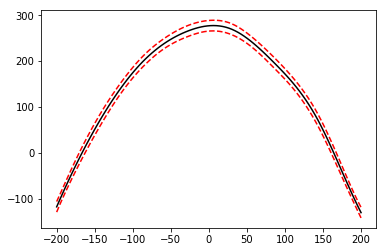

In [6]:
#for var x_2 we expect a quadratic relatioship since its modelled as (x_2+3*np.random.random((nr_datapoints,)))**2
PlotCertainGamVariable(Toy_gam[1],Toy_gam[0],"x_2")

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd1ec57a048>,
 <Figure size 432x288 with 1 Axes>)

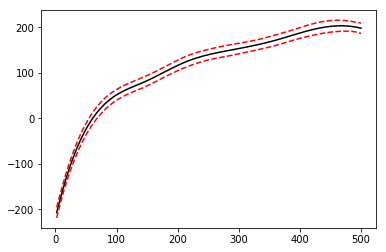

In [7]:
#for var x_1 we expect a log relatioship since its modelled as (np.log(x_1 + 5*np.random.random((nr_datapoints,))))
PlotCertainGamVariable(Toy_gam[1],Toy_gam[0],"x_1")

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd1ec563400>,
 <Figure size 432x288 with 1 Axes>)

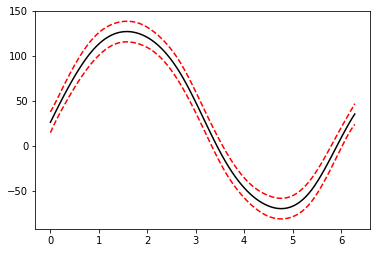

In [8]:
#for var x_5 we expect a sinusiodal relatioship since its modelled as np.sin(x_5)
PlotCertainGamVariable(Toy_gam[1],Toy_gam[0],"x_5")

In [12]:
# now we can try to see if variables with stong correlation are still included into the model
nr_datapoints=5000
x_01 = np.linspace(2,500,nr_datapoints)
x_02 = np.linspace(-200,200,nr_datapoints)
x_03 = np.linspace(-800,300,nr_datapoints)
x_04 = np.linspace(0,200,nr_datapoints)
x_05 = np.zeros((nr_datapoints,))
np.random.shuffle(x_01)
np.random.shuffle(x_02)
np.random.shuffle(x_03)
np.random.shuffle(x_04)
x_05+=x_02*0.1+50*np.random.random((nr_datapoints,))

# here x_5 is a highly correlated variable to x_2
print(np.corrcoef(x_05,x_02)[0,1])

b = 100
c = 0.01
y0 = 100*np.sin(x_05)+b * (np.log(x_01 + 5*np.random.random((nr_datapoints,))))- c * (x_02+3*np.random.random((nr_datapoints,)))**2 + np.random.random((nr_datapoints,)) * 200

data_toy_gam_corr={}
data_toy_gam_corr['x_1']=x_01
#np.random.shuffle(x_2)
data_toy_gam_corr['x_2']=x_02
data_toy_gam_corr['x_3']=x_03
data_toy_gam_corr['x_4']=x_04
data_toy_gam_corr['x_5']=x_05
data_toy_gam_corr=pd.DataFrame(data_toy_gam_corr)


0.636403611940166


In [13]:
# fitting those variables x_5 is excluded even if it would have contributed some explanatory power to the model,
# however, x_2 already provides all available information 
toy_gam=StepwiseGAMS(data_toy_gam_corr,fire_rate=np.reshape(y0,(1,-1)),return_model=True,Only_TOP=1,verbose=1)

trying adding x_1 resulting R2:0.258 AIC:109483
trying adding x_2 resulting R2:0.470 AIC:106115
trying adding x_3 resulting R2:0.001 AIC:112455
trying adding x_4 resulting R2:0.002 AIC:112444
trying adding x_5 resulting R2:0.063 AIC:111811
Variable: x_2 added. R2-improved by: 0.470 AIC: 106115
trying adding x_1 resulting R2:0.724 AIC:99612
trying adding x_5 resulting R2:0.470 AIC:106137
trying adding x_4 resulting R2:0.472 AIC:106109
trying adding x_3 resulting R2:0.471 AIC:106133
Variable: x_1 added. R2-improved by: 0.254 AIC: 99612
trying adding x_4 resulting R2:0.725 AIC:99612
trying adding x_5 resulting R2:0.724 AIC:99628
trying adding x_3 resulting R2:0.725 AIC:99626
Var x_4 doesn contribute enought R2 0.001. Stopping the model
Best model included ['x_2', 'x_1'], achieved pseudoR2: 0.725


In [11]:
# Delta R analysis
# lets determine the contribution of individual variables to the model.
# we will shuffle individual variables and see how this affects the model performance

# fit full model
vars2include=StepwiseGAMS(data_toy_gam,fire_rate= y,return_model=True)[0]
X_data = data_toy_gam[vars2include]
Toy_gam=FitGAM(X_data, y,vars2include,[])
print(Toy_gam.summary()) #prin summary

Best model included ['x_2', 'x_1', 'x_5'], achieved pseudoR2: 0.788
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     23.0578
Link Function:                     IdentityLink Log Likelihood:                                -49230.6883
Number of Samples:                         5000 AIC:                                            98509.4922
                                                AICc:                                           98509.7345
                                                GCV:                                             7596.6685
                                                Scale:                                           7533.6359
                                                Pseudo R-Squared:           

/home/deaplearning/miniconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """


In [167]:
fullmodel_r = Toy_gam.statistics_["pseudo_r2"]["explained_deviance"]
for v_id, var in enumerate(vars2include): # now for each variable we shuffle it 
    X_mod= np.copy(X_data)
    shuffle_idx=np.arange(0,X_data.shape[0])
    np.random.shuffle(shuffle_idx)
    X_mod[:,v_id] = X_mod[shuffle_idx,v_id]
    mu=Toy_gam.predict_mu(np.array(X_mod)) # estimate the y with variable shuffled
    r=Toy_gam._estimate_r2(mu=mu/mu.mean(),y=y/y.mean())['explained_deviance'] # calculate new r
    deltaR = fullmodel_r-r
    if deltaR > fullmodel_r:
        deltaR=fullmodel_r    
    print("When shuffling %s R2 reduced by %0.3f"%(var,deltaR))

When shuffling x_2 R2 reduced by 0.781
When shuffling x_1 R2 reduced by 0.471
When shuffling x_5 R2 reduced by 0.276


In [14]:
# Virtual headfixation
# we now try to estimate y without the effects of x_2 and x_1
# for this purpose we take our GAM model and the data we had for this session, and set x_2 and x_1 values to 0 ( in case of actuall body variables to median to simulate the "normal" pose)
# please note this is equivalent to previously shown individual contributions, in case we only leave a single variable 

X_mod= np.copy(X_data)
X_mod[:,0] = 0#np.median(X_mod[:,0])
X_mod[:,1] = 0#np.median(X_mod[:,1])
mu=Toy_gam.predict(np.array(X_mod)) # estimation of the model with effects of x_2 and x_1 removed

y_only5 = b*np.sin(x_5)+  b * (np.log(0 + 5*np.random.random((nr_datapoints,)))) - c * (0+3*np.random.random((nr_datapoints,)))**2 + np.random.random((nr_datapoints,)) * b*noisiness


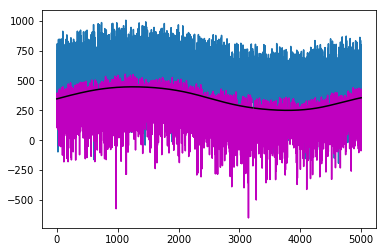

In [15]:
# Now we plot the original y, the y with x_2 and x_1 set to 0 and the estimated y by "headfixed" model.
# we can see the model was able to capture the effect of x_5 on the data, the noise cant be modelled

plt.figure()
plt.clf()
plt.plot(y[0,:])
plt.plot(y_only5[:],'m')
plt.plot(mu[:],'k')